In [20]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import h5py

In [21]:
dataset=load_iris()['data']

In [22]:
dataset[10:15,:]

array([[5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2]])

In [63]:
target=[0,1,0,1,0]

In [64]:
def loadData_iris():
    X = dataset[10:15,:]
    Y = target
    return X,Y

In [65]:
X,Y = loadData_iris()
print(Y)

[0, 1, 0, 1, 0]


In [67]:
Y=np.array(Y)
print(Y)

[0 1 0 1 0]


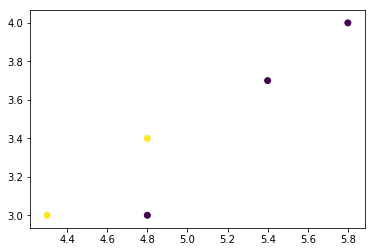

In [68]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [70]:
def sigmoid(Z):
    return 1./(1. + np.exp(-Z))

In [71]:
def initial(n):
    np.random.seed(1)
    W = np.random.rand(1,n)
    b = np.zeros((1,1))
    return W,b

In [72]:
def LR(X_train,y_train,alpha,Iter,is_print=False):
    m,n = X_train.shape
    W,b = initial(n)
    cost = []
    for iter_ in range(Iter):

        Z = np.dot(W,X_train.T) + b
        A = sigmoid(Z)
        
        loss = -np.sum((y_train*np.log(A)+(1-y_train)*np.log(1-A)))/m
        cost.append(loss)
        
        if is_print and iter_ % 10==0:
            print("Iter:{},loss:{}".format(iter_,loss))
            
        dZ = A - y_train
        
        dW = np.dot(dZ,X_train)/m
        
        assert dW.shape == W.shape  # Make sure the shape is rigth.
        
        db = np.sum(dZ,keepdims=True) /m
        
        assert db.shape == b.shape 
        
        # Update parameters.
        
        W = W - alpha * dW
        b = b - alpha * db
        
    return W,b,cost

In [73]:
 X_train.shape

(4, 4)

In [74]:
X_train.T

array([[5.8, 4.8, 5.4, 4.3],
       [4. , 3. , 3.7, 3. ],
       [1.2, 1.4, 1.5, 1.1],
       [0.2, 0.1, 0.2, 0.1]])

In [76]:
W,b,cost = LR(X_train,y_train,0.1,100,is_print=True)

Iter:0,loss:3.644107374670488
Iter:10,loss:0.5180022481376736
Iter:20,loss:0.5164191704611562
Iter:30,loss:0.5148414459785627
Iter:40,loss:0.5132690690239476
Iter:50,loss:0.5117020338309923
Iter:60,loss:0.51014033446879
Iter:70,loss:0.5085839648433446
Iter:80,loss:0.5070329186990816
Iter:90,loss:0.5054871896203748


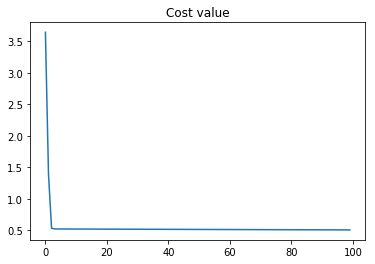

In [77]:
plt.plot(cost);plt.title('Cost value');